In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')

%matplotlib inline

In [100]:
os.chdir('E:/data_scien/course/Complete_DA_Bootcamp/EDA/exe')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.shape

(10841, 13)

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data cleaning

In [8]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
def convert_review2numbers(x):
    if 'M' in x:
        return int(float(x.split('M')[0]) * 1000000)
    return int(x)

convert_review2numbers('3M')

3000000

In [10]:
df['Reviews'].isnull().sum()

0

In [15]:
df['Reviews'] = df['Reviews'].apply(convert_review2numbers)

In [17]:
df['Reviews'].max()

78158306

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
def is_number(x):
    try:
        if x.isnumeric():
            return True
        float(x)
        return '.' in x
        
    except ValueError:
         return False

In [30]:
df['Size'] = df['Size'].str.replace('M', '000')
df['Size'] = df['Size'].str.replace('k', '')
df[~df['Size'].apply(is_number)]['Size'].unique()

array(['Varies with device', '1,000+'], dtype=object)

In [33]:
df['Size'] = df['Size'].str.replace('1,000+', '1000')
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [36]:
mode_value_Size = df['Size'].mean()
mode_value_Size

19577.38848677017

In [42]:
df['Size'] = df['Size'].fillna(mode_value_Size)

In [43]:
df[df['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [44]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [46]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [50]:
df['Installs'] = df['Installs'].replace('Free', np.nan)
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', nan],
      dtype=object)

In [52]:
df['Installs'] = df['Installs'].astype(float)

In [53]:
mean_value_Installs = df['Installs'].mean()
mean_value_Installs

15464338.882564576

In [55]:
df['Installs'] = df['Installs'].fillna(mean_value_Installs)
df['Installs'].isnull().sum()

0

In [56]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [79]:
df['Installs'] = df['Installs'].astype(int)

In [59]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].replace('Everyone', np.nan)
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', nan,
       '1.20', '1.04'], dtype=object)

In [60]:
df['Price'] = df['Price'].astype(float)

In [73]:
mean_Price = df['Price'].mean()
mean_Price

1.027368081180812

In [74]:
df['Price'] = df['Price'].fillna(mean_Price)

In [75]:
df['Price'].unique()

array([  0.        ,   4.99      ,   3.99      ,   6.99      ,
         1.49      ,   2.99      ,   7.99      ,   5.99      ,
         3.49      ,   1.99      ,   9.99      ,   7.49      ,
         0.99      ,   9.        ,   5.49      ,  10.        ,
        24.99      ,  11.99      ,  79.99      ,  16.99      ,
        14.99      ,   1.        ,  29.99      ,  12.99      ,
         2.49      ,  10.99      ,   1.5       ,  19.99      ,
        15.99      ,  33.99      ,  74.99      ,  39.99      ,
         3.95      ,   4.49      ,   1.7       ,   8.99      ,
         2.        ,   3.88      ,  25.99      , 399.99      ,
        17.99      , 400.        ,   3.02      ,   1.76      ,
         4.84      ,   4.77      ,   1.61      ,   2.5       ,
         1.59      ,   6.49      ,   1.29      ,   5.        ,
        13.99      , 299.99      , 379.99      ,  37.99      ,
        18.99      , 389.99      ,  19.9       ,   8.49      ,
         1.75      ,  14.        ,   4.85      ,  46.99

In [76]:
df['Price'].isnull().sum()

0

In [77]:
df[df['Price'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1.0+ MB


In [82]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [91]:
def convert_to_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        month, day, year = x.split('.')

        if day == '0':
            day = '1'

        year = '20' + year

        date_obj = datetime.strptime(f"{month} {day} {year}", "%m %d %Y")
        
        return pd.to_datetime(date_obj)
        

In [93]:
df['Last Updated'] = df['Last Updated'].apply(convert_to_datetime)
df['Date'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.day
df['Year'] = df['Last Updated'].dt.year
df.drop('Last Updated', axis=1, inplace=True)

In [102]:
df['Year_in_float'] = ((df['Date'] + (df['Month'] - 1) * 30) / 365 + df['Year']).astype(float) 

In [104]:
df.drop(['Date', 'Month', 'Year'], axis=1, inplace=True)

In [105]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Year_in_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018.512329
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2019.191781


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Year_in_float   10841 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 1.0+ MB


In [101]:
df.to_csv('./data/google_playstore.csv')

# EDA

In [111]:
#check duplicated records
df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated(float)
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,19577.388487,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,2020.126027
236,Box,BUSINESS,4.2,159872,19577.388487,10000000,Free,0.0,Everyone,Business,Varies with device,Varies with device,2020.550685
239,Google My Business,BUSINESS,4.4,70991,19577.388487,5000000,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,2019.956164
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.000000,10000000,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,2019.616438
261,join.me - Simple Meetings,BUSINESS,4.0,6989,19577.388487,1000000,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,2019.276712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.400000,100000,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,2018.041096
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.000000,1000000,Free,0.0,Everyone,Communication,5.2,5.0 and up,2018.427397
10730,FP Notebook,MEDICAL,4.5,410,60000.000000,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,2019.956164
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.000000,1000000,Free,0.0,Everyone,Shopping,3.9,4.4 and up,2020.465753


In [114]:
df = df.drop_duplicates(subset=['App'], keep='first')

In [115]:
df.shape

(9660, 13)

In [116]:
df = df.rename(columns={'Year_in_float': 'Last Updated(float)'})

In [119]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'O']
obj_cols = [col for col in df.columns if df[col].dtype == 'O']

print(f'Number of numeric columns is: {len(numeric_cols)} which are {numeric_cols}')
print(f'\nNumber of object columns is: {len(obj_cols)} which are {obj_cols}')

Number of numeric columns is: 6 which are ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated(float)']

Number of object columns is: 7 which are ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [121]:
#proportion of count data on categorical columns
for col in obj_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print('--------------------------------------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010352
CK Pharmacies                                     0.010352
CK Call NEW                                       0.010352
Ck Coif                                           0.010352
CONTRACT KILLER: ZOMBIES                          0.010352
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010352
Dance School Stories - Dance Dreams Come True     0.010352
3D Bowling                                        0.010352
Mind Games Pro                                    0.010352
iHoroscope - 2018 Daily Horoscope & Astrology     0.010352
Name: proportion, Length: 9660, dtype: float64
--------------------------------------------------------------
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY            3.8716

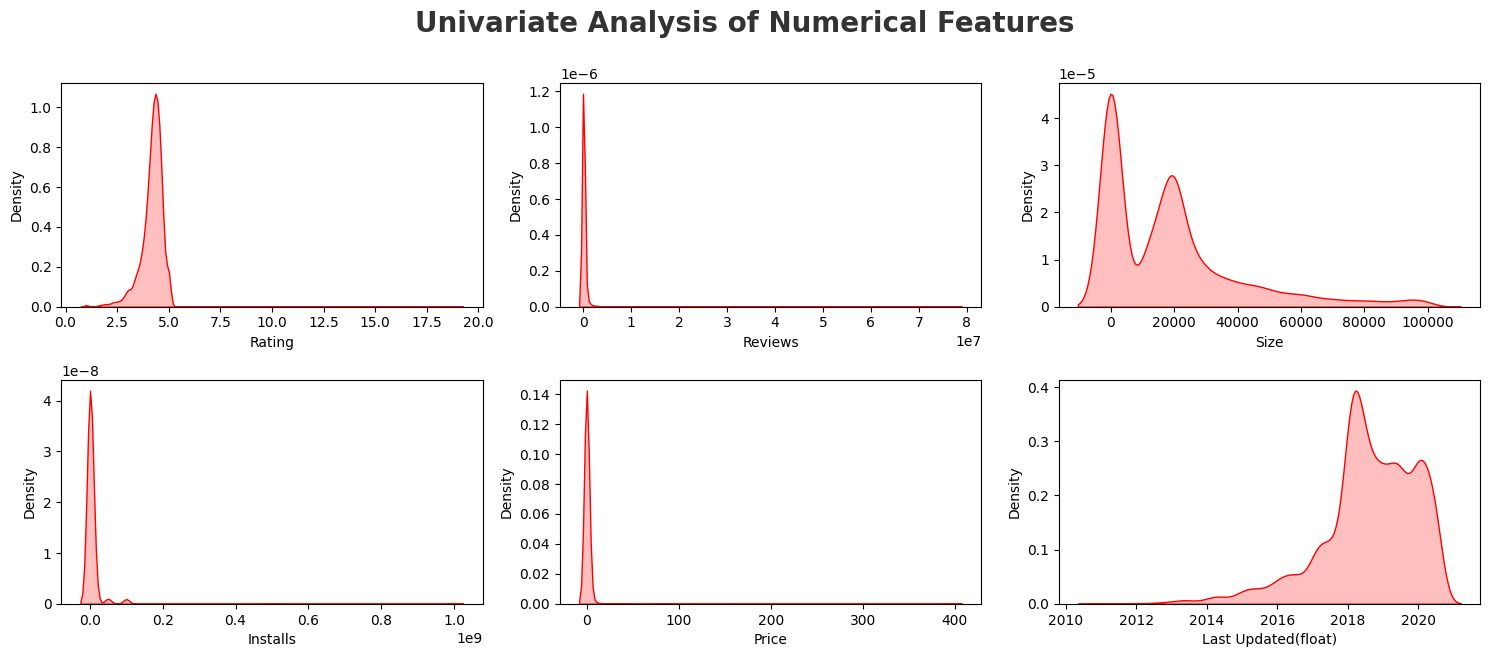

In [123]:
# Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_cols[i]], shade=True, color='r')
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

In [ ]:
# Rating and Last Updated(float) are leftskewed while Reviews, Size, Installs, Price are right-skewed

# Observation

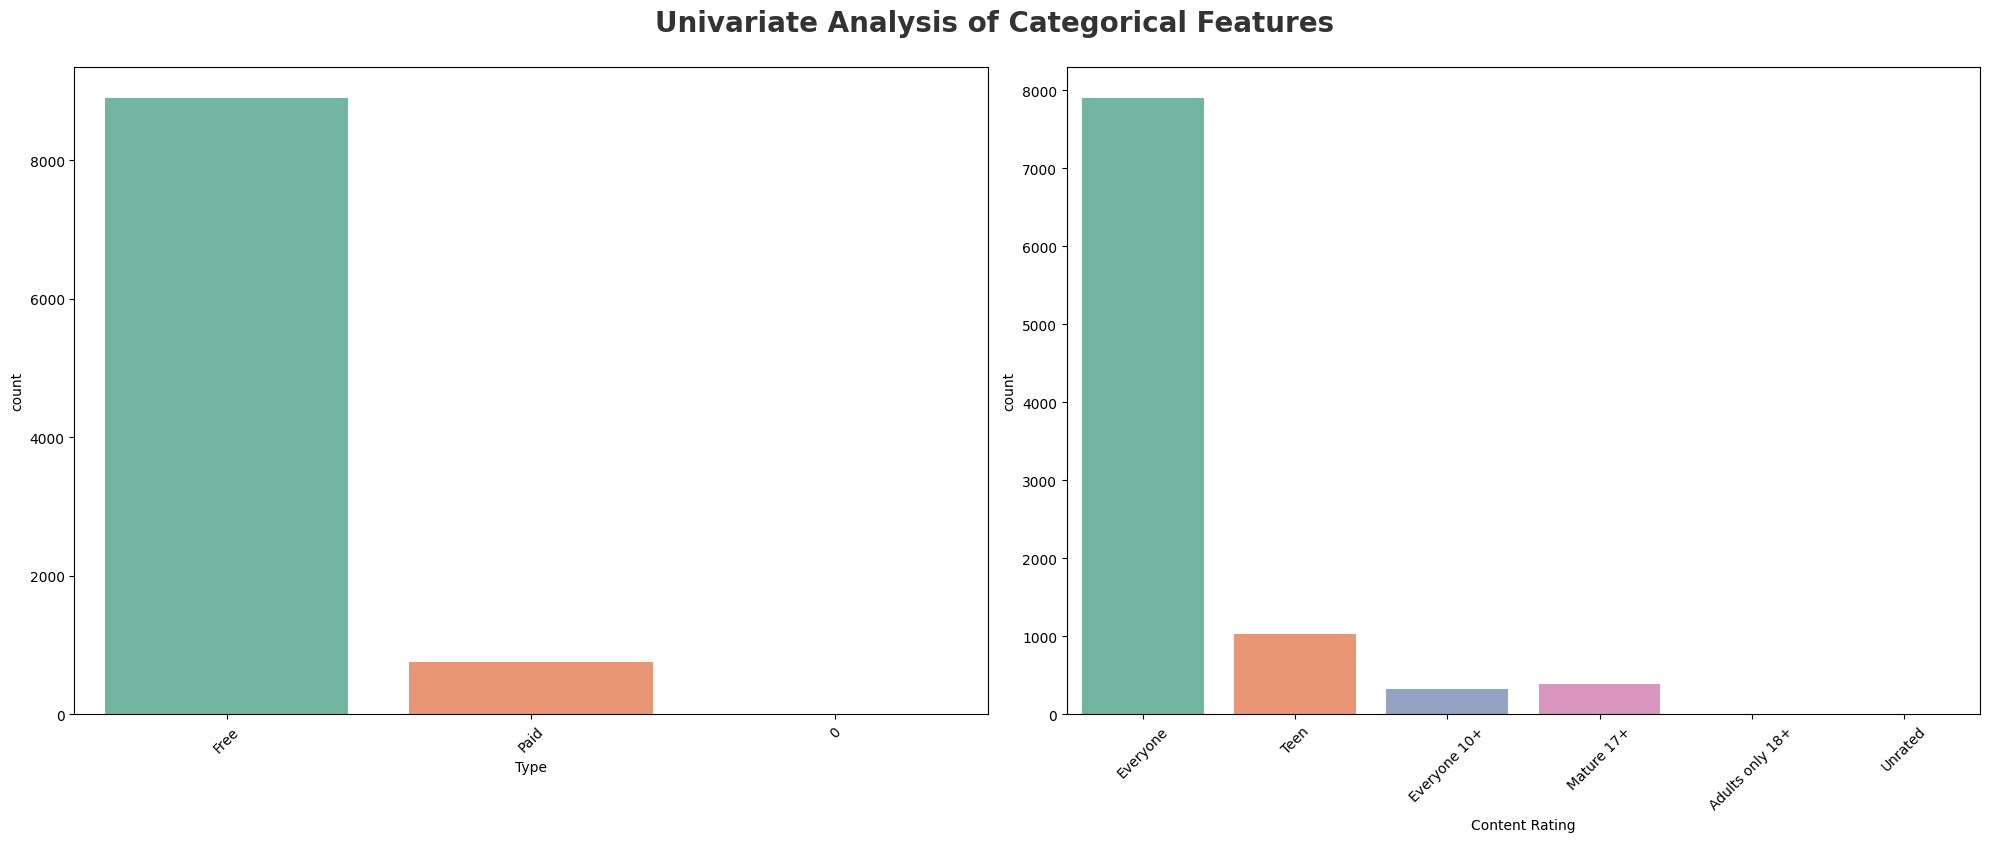

In [129]:
#categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Which is the most popular app category? 

<Axes: ylabel='count'>

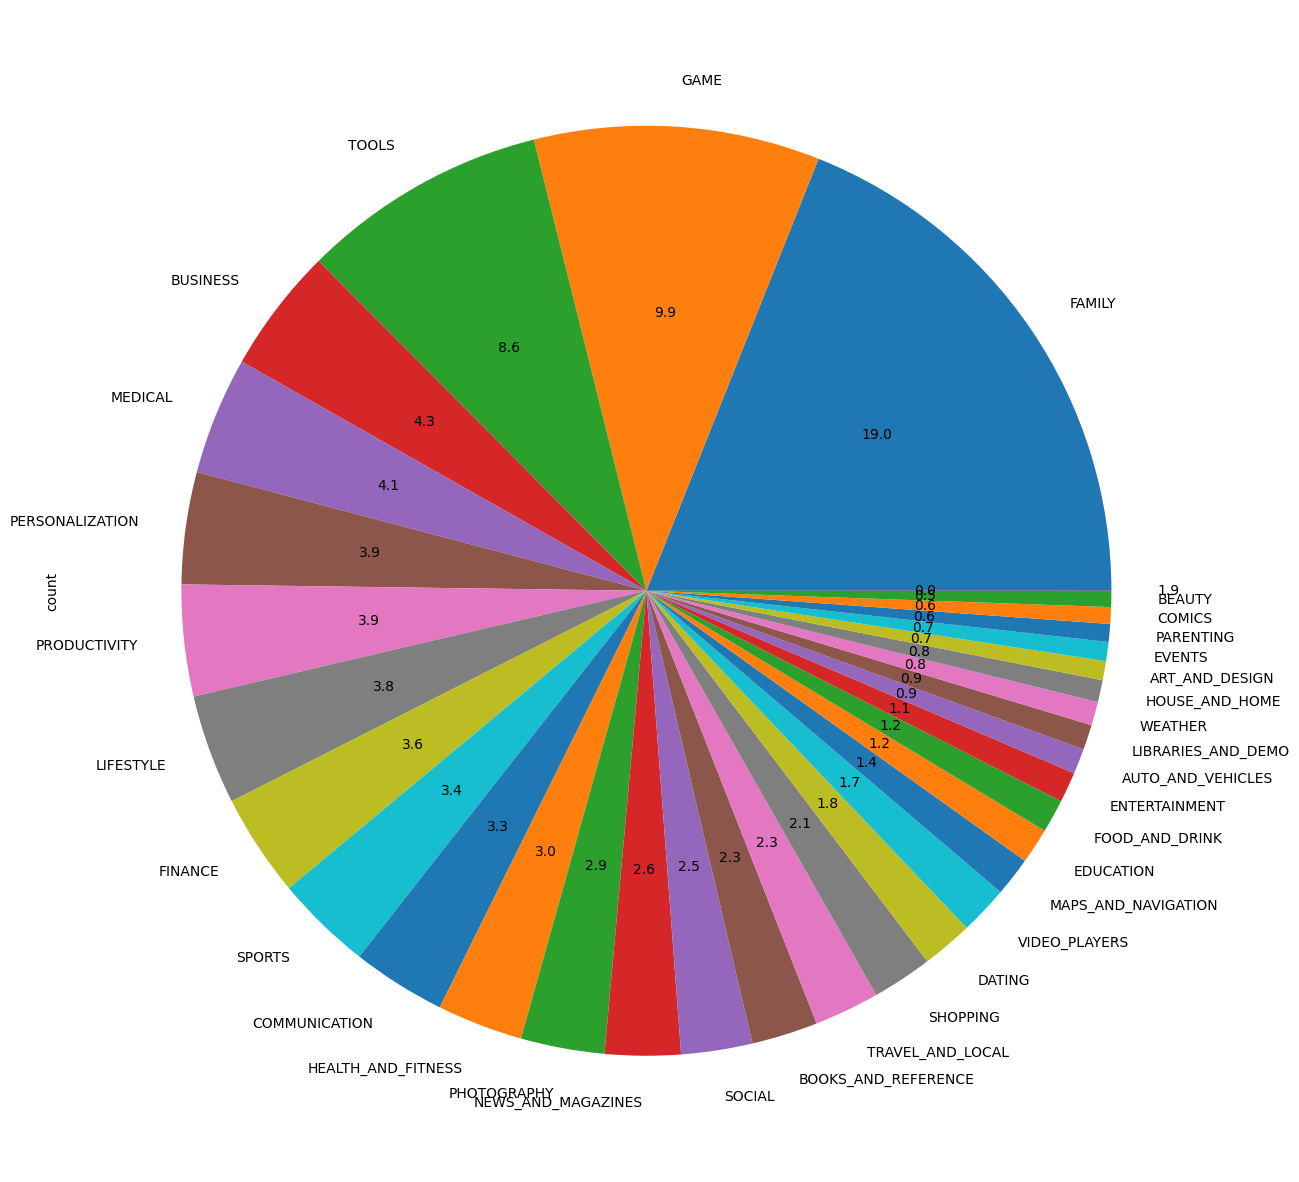

In [135]:
df['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15, 16), autopct='%1.1f')

# Observation
1. The most popular category is Family. There are more kinds of apps in playstore which are under category of family, game and tools
2. Beauty, comics, arts and weather kinds of apps are very less in playstore

In [165]:
category = pd.DataFrame(df['Category'].value_counts())  # Get the counts of each category
category.columns = ['count']  # Rename the column to 'count'

In [166]:
category.columns

Index(['count'], dtype='object')

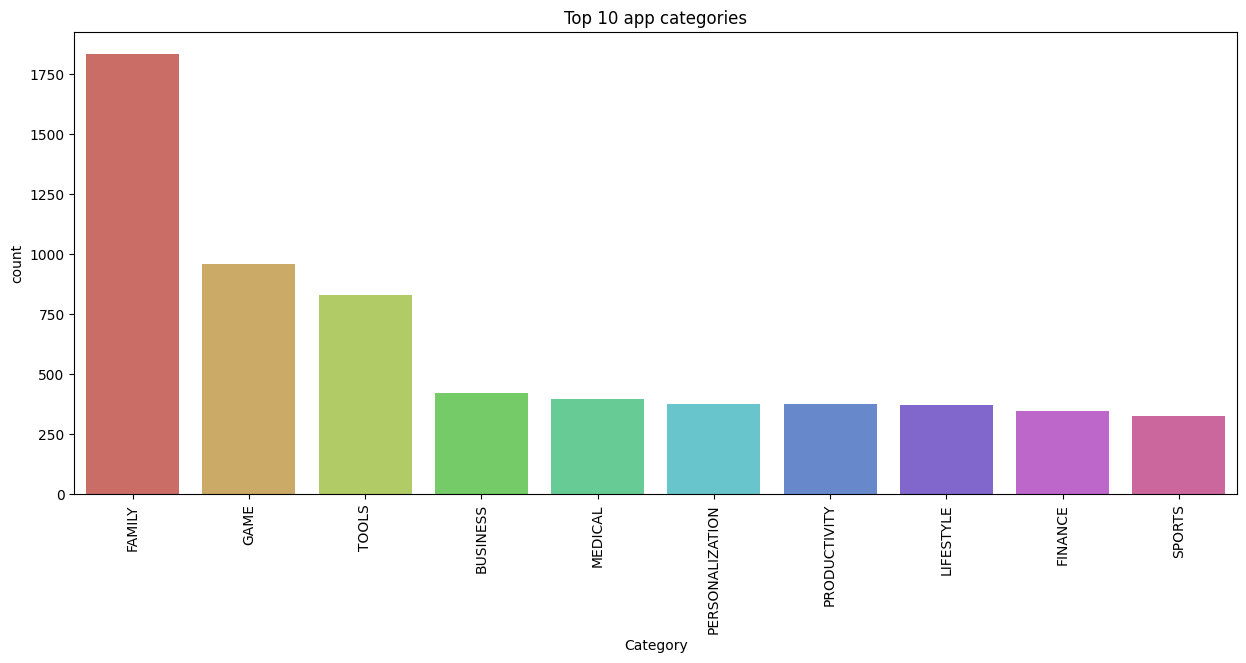

In [168]:
plt.figure(figsize=(15, 6))
sns.barplot(x=category.index[:10], y=category['count'][:10], palette='hls')  # Correct y-axis reference
plt.title('Top 10 app categories')
plt.xticks(rotation=90)
plt.show()

# Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Game with 11%
2. Least number of apps belong to the beauty which is less than 1% of the total apps